In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import math
import copy

In [79]:
data = fetch_california_housing()
print(data.keys())
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedianHouseVal"] = data.target
data=df
print(data.head(10))


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedianHouseVal  
0    -122.23           4.526  
1    -122.22        

In [80]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=42)

y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()


(20640, 8)
(20640,)


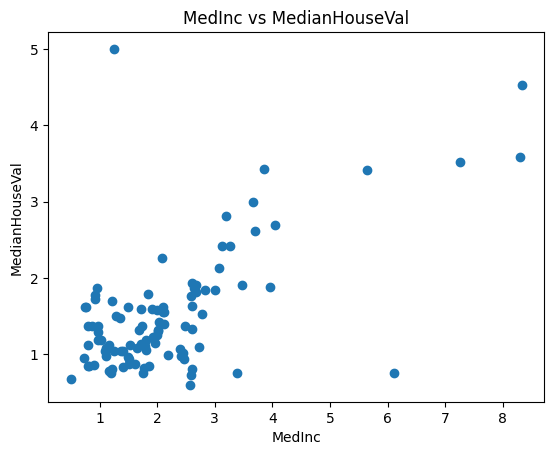

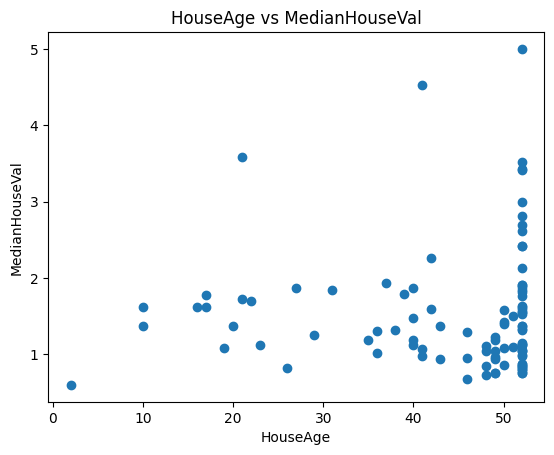

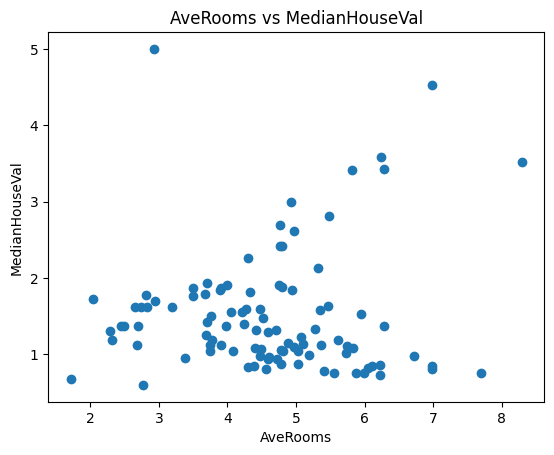

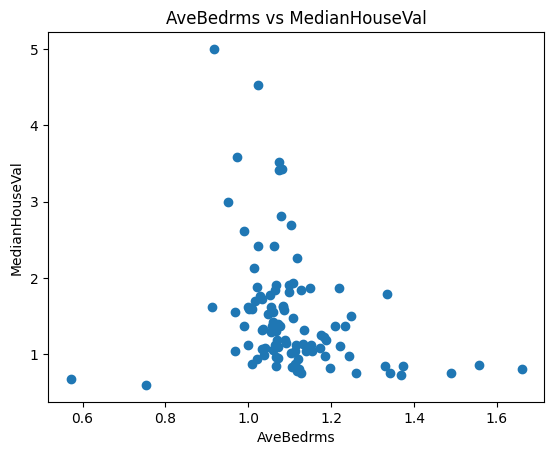

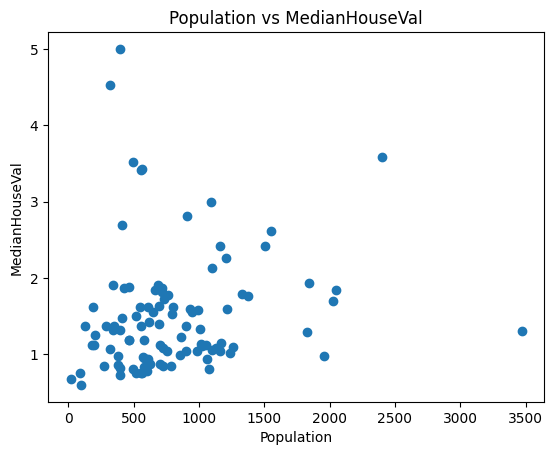

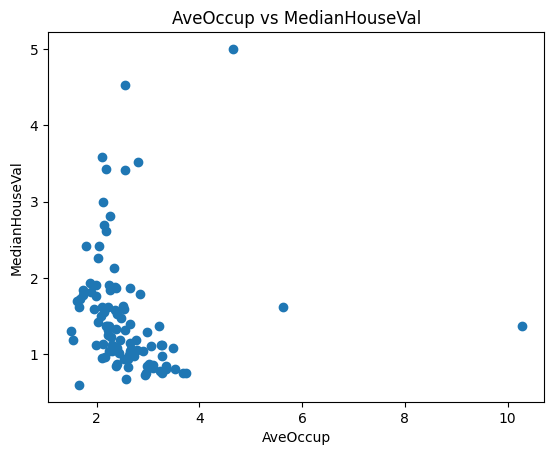

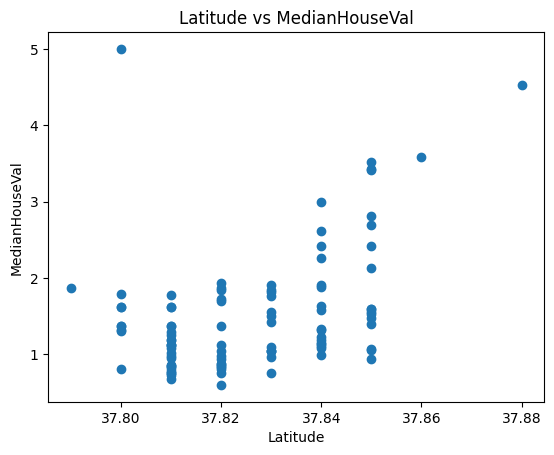

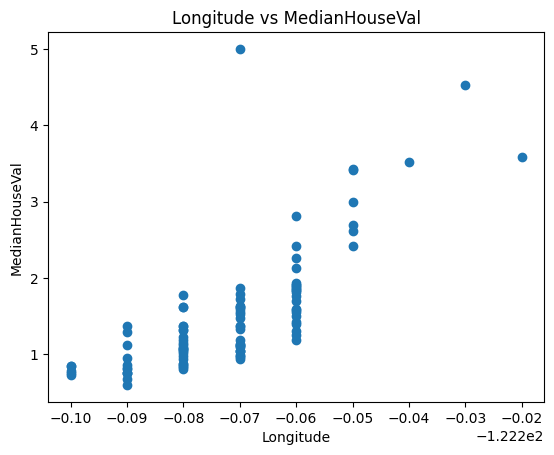

In [84]:
for column in X.columns:
    plt.figure()
    plt.scatter(X[column][:100], y[:100])
    plt.xlabel(column)
    plt.ylabel("MedianHouseVal")
    plt.title(f"{column} vs MedianHouseVal")
    plt.show()

As we can observe from above plots, MedInc,AveRooms,AveBedrms(features) vs MedianHouseVal(Target) shows a more linear graph structure than Longitude,Latitude vs MedianHouseVal which more random. Even against HouseAge the graph is not useful.
Hence weight of MedInc,AveRooms,AveBedrms will have greater value than weight of age and s4.

Equation for Multiple Linear Regression :

y_hat = f_xi = w.x + b

Loss function :

J_wb = 1/2m * sum(f_xi - yi)**2

In [37]:
def compute_loss(X, y, w, b):
    m = X.shape[0]
    loss = 0.0
    for i in range(m):
        f_xi = np.dot(X[i], w) + b
        loss = loss + (f_xi - y[i])**2
    loss = loss / (2 * m)
    return loss

Gradient Descent Algorithm:

w_j = w_j - a * dJ_dw_j

b = b - a * dJ_db

where a is learning rate

Derivatives :

dJ_dw_j = (1/m) * sum( (y_hat - y) * x_j )

dJ_db   = (1/m) * sum( y_hat - y )

In [34]:
def compute_gradient(X, y, w, b): 

    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        loss = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + loss * X[i, j]
        dj_db = dj_db + loss
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [35]:
def gradient_descent(X, y, w_in, b_in, loss_function, gradient_function, alpha, num_iters): 

    J_list = []
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)

    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_list.append(loss_function(X, y, w, b))

    return w, b, J_list

In [93]:
initial_w = np.zeros(X.shape[1])
initial_b = 0.0
# some gradient descent settings 
iterations = 1000
alpha = 0.1
# run gradient descent 
w_final, b_final, J_list = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_loss, compute_gradient, 
                                                    alpha, iterations)
print('Progression of J after each iteration -\n',J_list)
print(f'Weights- {w_final}\nBias -{b_final}')



Progression of J after each iteration -
 [2.337380039594973, 1.9517898954737114, 1.6402157977599425, 1.3883018863263654, 1.1845106261789504, 1.0195595269264046, 0.8859734485928845, 0.7777278771854358, 0.6899640584116318, 0.618761077846219, 0.5609531999697189, 0.5139832680082999, 0.4757848992050201, 0.444687718069088, 0.41934105198608757, 0.39865244363563185, 0.38173806927301585, 0.36788273405236305, 0.35650757817963513, 0.34714399624862224, 0.33941256639767947, 0.3330060213506341, 0.32767548205766095, 0.3232193260406377, 0.3194741841839421, 0.31630765754721785, 0.3136124245403957, 0.3113014722614551, 0.3093042369613777, 0.30756347987540356, 0.30603275797305757, 0.3046743760780849, 0.303457728537461, 0.30235795617460387, 0.3013548584515118, 0.30043201223560134, 0.29957605784246155, 0.2987761205271731, 0.2980233416644368, 0.2973104987665175, 0.2966316974594057, 0.29598212175146227, 0.29535783152947853, 0.29475559832205434, 0.29417277207405085, 0.2936071730550156, 0.29305700414123387, 0.2

[[-1.15248922 -0.2891866  -0.49989596 ...  0.07768129  0.20044873
   0.27936569]
 [-0.70501534  0.10810379 -0.1574771  ... -0.03763415 -0.23028292
   0.05475686]
 [-0.20558796  1.85618152 -0.5868143  ... -0.164679    1.01509336
  -1.43265267]
 ...
 [ 2.82092723 -0.2891866   0.73104024 ... -0.02697551  0.78568194
  -1.23799169]
 [-0.57147326  0.58485227 -0.05657389 ... -0.04641411  0.53286119
  -0.09498235]
 [-0.16768875 -0.92485123 -0.58209158 ...  0.06347664 -0.66101456
   0.59880935]]
[0.71972694 1.76352684 2.71027641 ... 4.46870429 1.18791843 2.00963315]


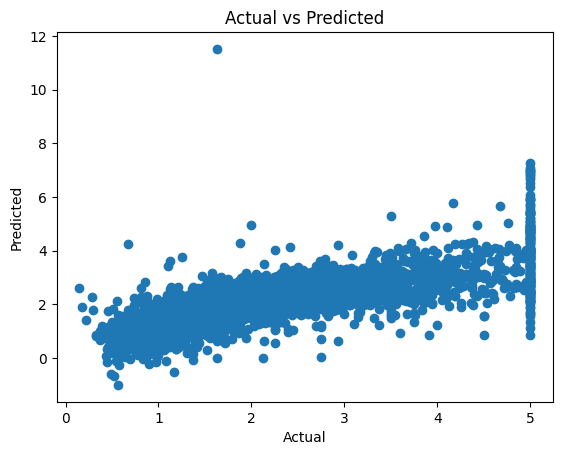

In [94]:
print(X_test)
y_pred = np.dot(X_test, w_final) + b_final

print(y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [95]:
rmse =  np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.7456457434758587
R2 Score: 0.5757144647238095
